# EDA and Language Processing: Tokenizer

In this notebook, we'll take our cleaned dataframe and do some further language processing

#### Make necessary imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

import regex as re
import nltk

Read in dataframe of cleaned tweets

In [2]:
# Read in dataframe of cleaned tweets
df = pd.read_csv('csv_files/df.csv')

In [3]:
# Preview dataframe
df.head()

,Unnamed: 0,username,text
0,0,mult co fire ems log,med medical at block of ne th ave por...
1,1,mult co fire ems log,med medical at se nd ave se johnson cree...
2,2,michellebot,valley of fire valley of fire state park
3,3,mult co fire ems log,med medical at block of ne rodney ave ...
4,4,houdini,special shout out to m llyk y for comin throu...


## Create a fuction to tokenize and extract features of the social media posts in our sample

In [4]:
def tokenize_tweets(dataframe):
    
    # Instantiate Tokenizer
    token = RegexpTokenizer(r'\w+')
    
    # tokenize each tweet in the dataframe
    tweet_tokens = []
    for tweet in dataframe['text']:
        a = token.tokenize(tweet.lower())
        tweet_tokens.append(a)
    
    # Replace 'text' column with tokens
    dataframe['text'] = tweet_tokens
    
    return dataframe


In [5]:
# Reset fires dataframe equal to 
df = tokenize_tweets(df)

In [6]:
df.head()

,Unnamed: 0,username,text
0,0,mult co fire ems log,"[med, medical, at, block, of, ne, th, ave, por..."
1,1,mult co fire ems log,"[med, medical, at, se, nd, ave, se, johnson, c..."
2,2,michellebot,"[valley, of, fire, valley, of, fire, state, park]"
3,3,mult co fire ems log,"[med, medical, at, block, of, ne, rodney, ave,..."
4,4,houdini,"[special, shout, out, to, m, llyk, y, for, com..."


In [7]:
# Save tokenized dataframe as a csv
df.to_csv(r'./csv_files/tweets_tokenized.csv')

## Exploratory Data Analysis

In [8]:
# Define a function to turn this list of lists into a single list
def single_list(dataframe):
    
    single_list = []
    for row in dataframe['text']:
        for word in row:
            single_list.append(word)
            
    return single_list

In [9]:
# Create single list of words 
text_words = single_list(df)

In [10]:
# What are some of the most common words contained in these tweets?
# Method found on The Programming Historian: https://programminghistorian.org/en/lessons/counting-frequencies

# Create an empty list
word_frequency = []

# Loop through the list of words and count each one up
[word_frequency.append(text_words.count(word)) for word in text_words]

#print("Pairs\n" + str(list(zip(text_words, word_frequency))))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [11]:
# Create blank dataframe
# This dataframe is ONLY being used to count up the words that are found the most frequently in these tweets
word_counts = pd.DataFrame()

# Add desired columns from previously defined variables
word_counts['words'] = text_words
word_counts['word_frequency'] = word_frequency

In [12]:
word_counts['words'].drop_duplicates(inplace=True)

In [13]:
# Sort dataframe by word frequency
word_counts.sort_values('word_frequency', ascending=False, inplace=True)

# Drop duplicate words
word_counts.drop_duplicates(subset = 'words', keep = 'first', inplace=True)

# Look at the 20 most commonly used words
word_counts.head(20)

,words,word_frequency
23143,portland,9081
113571,fire,8269
137703,the,6583
100749,of,6328
89678,at,5522
136328,or,4990
119769,rp,4557
64856,pdx,4405
67846,block,3733
82011,medical,3432


In [14]:
# Save df as csv 
word_counts.to_csv(r'./csv_files/word_counts.csv')

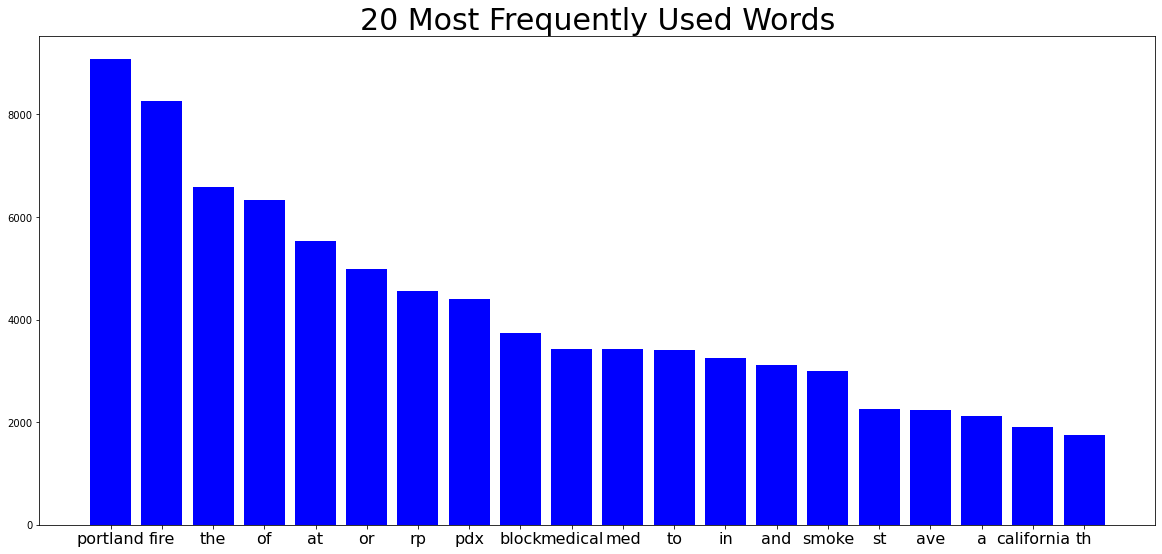

In [66]:
# Create a bar chart of the most commonly used words 

# Create x and y variables
x = word_counts['words'][0:20]
y = word_counts['word_frequency'][0:20]

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 9))
width = 0.8
ax.set_xticklabels(x, size = 16)
#ax.set_yticklabels(y, size = 20)
ax.set_title('20 Most Frequently Used Words', size = 30)
ax.bar(x, y, width, color = 'blue');

#### Account word stopwords in nltk.corpus

In [17]:
word_counts_2 = word_counts.copy()
word_counts_2

# Remove stopwords from x variable
def nltk_stopwords_remover(df, column):
    
    new_df = pd.DataFrame(columns = df.columns)

    for word in [row for row in df[column]]: 
        if word in stopwords.words('english'):
            df.drop(axis=0, index = df[df[column] == word].index[0], inplace=True)
        else:
            pass
        
    return df

x_var = nltk_stopwords_remover(word_counts_2, 'words')

In [19]:
# Save df as csv 
x_var.to_csv(r'./csv_files/word_counts_stop_words.csv')

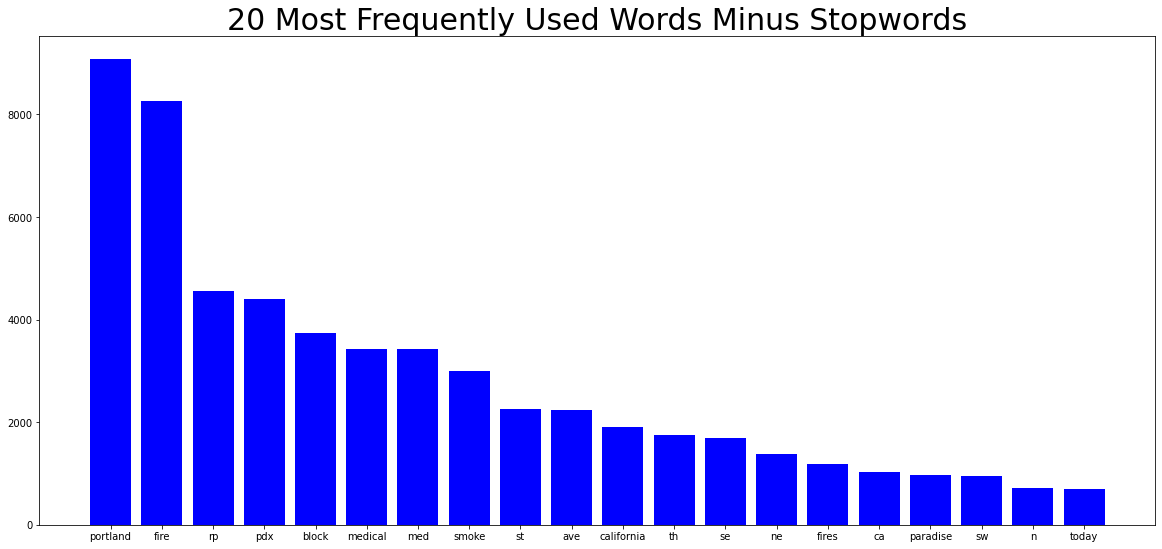

In [69]:
# Create a bar chart of the most commonly used words 
x_var = pd.read_csv('./csv_files/word_counts_stop_words.csv')

# Create x and y variables
x2 = x_var['words'][0:20]
y = x_var['word_frequency'][0:20]

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 9))
width = 0.8
ax.set_xticklabels(x2, size = 10)
#ax.set_yticklabels(y, size = 20)
ax.set_title('20 Most Frequently Used Words Minus Stopwords', size = 30)
ax.bar(x2, y, width, color = 'blue');

#### Create the same visuals with data that's been normalized

In [20]:
# Create new column that represents the percentage of each word's makeup of every word in all tweets

word_pct = [length / word_counts['word_frequency'].sum() for length in word_counts['word_frequency']]
word_counts['word_pct'] = word_pct
word_counts.head(15)

,words,word_frequency,word_pct
23143,portland,9081,0.039662
113571,fire,8269,0.036116
137703,the,6583,0.028752
100749,of,6328,0.027638
89678,at,5522,0.024118
136328,or,4990,0.021794
119769,rp,4557,0.019903
64856,pdx,4405,0.019239
67846,block,3733,0.016304
82011,medical,3432,0.014990


In [46]:
# Do the same thing without stop words

word_pct2 = [length / x_var['word_frequency'].sum() for length in x_var['word_frequency']]
x_var['word_pct'] = word_pct2
x_var.head(15)
#x_var.set_index(['words'], inplace=True)
x_var.drop(columns=['Unnamed: 0'],inplace=True)
x_var.head(20)

,words,word_frequency,word_pct
0,portland,9081,0.057370
1,fire,8269,0.052240
2,rp,4557,0.028789
3,pdx,4405,0.027829
4,block,3733,0.023584
5,medical,3432,0.021682
6,med,3427,0.021650
7,smoke,2989,0.018883
8,st,2249,0.014208
9,ave,2236,0.014126


### Create a lemmatizing function

In [ ]:
# Check top 5 rows again
df.head()

In [ ]:
def lemmatize_df(dataframe):
    # Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Create lemmatized tokens
    # Method taught to us by Matt Braum in General Assembly DSI
    
    # Start with an empty list
    tokens_lem = []
    
    # Create a nested for loop
    for row in dataframe['text']:
        
        new_row = []
        
        for token in row:
            
            lemma = lemmatizer.lemmatize(token)
            new_row.append(lemma)
            
        tokens_lem.append(new_row)
            
    
    # Replace original columns with lemmatized tokens
    dataframe['text'] = tokens_lem
    
    return dataframe

In [ ]:
# Call function, set equal to variable
lemma_df = lemmatize_df(df)

# Save file as csv back to jupyter notebook
lemma_df.to_csv(r'./csv_files/tweets_lemmatized.csv')

### Create a lemmatizing function

In [ ]:
def stem_df(dataframe):
    # Instantiate object of class PorterStemmer.
    p_stemmer = PorterStemmer()
    
    # Create stemmed tokens
    # Start with an empty list
    tokens_stem = []
    
    # Create a nested for loop
    for row in dataframe['text']:
        
        new_row = []
        
        for token in row:
            
            stem = p_stemmer.stem(token)
            new_row.append(stem)
            
        tokens_stem.append(new_row)
            
    
    # Replace original columns with lemmatized tokens
    dataframe['text'] = tokens_stem
    
    return dataframe

In [ ]:
# Call function, set it equal to a variable
stemmed_df = stem_df(df)

# Save file as csv back to jupyter notebook
stemmed_df.to_csv(r'./csv_files/tweets_stemmed.csv')